# Wiki

In [1]:
import pandas as pd
import numpy as np
import itertools

In [2]:
pure_deepar_crps = np.load('/root/deepar-hier/result/deepar_hier/metrics.npy',allow_pickle=True).item()['CRPS']
deepar_hier_crps = np.load('/root/deepar-hier/experiments/param_search/lam_0.002-lstm_dropout_0.4/eval_metrics.npy',allow_pickle=True).item()['CRPS']

In [3]:
pure_deepar_df = pd.DataFrame({'DeepAR-Hier':pure_deepar_crps})
deepar_hier_df = pd.DataFrame({'DeepAR':deepar_hier_crps})

In [4]:
hier_dict_name = np.load('data/tourism/hier_dict_name.npy',allow_pickle=True).item()
hier_dict = np.load('data/tourism/hier_dict.npy',allow_pickle=True).item()
series_names = list(pd.read_csv('data/tourism/series_names.csv',index_col=0)['0'])
df_l = []
crps_l = []
for fcst_model,permute_method,rcc_method,rcc_covariance in itertools.product(['arima','ets'],['stack','rank','random'],['mint','bu'],['struct','none']):
  try:
    my_metrics = np.load(f'result/{fcst_model}_{permute_method}_{rcc_method}_{rcc_covariance}/metrics.npy',allow_pickle=True).item()['crps']
    df = pd.DataFrame({f'{fcst_model.capitalize()}_{permute_method.capitalize()}_{rcc_method.capitalize()}_{rcc_covariance.capitalize()}':my_metrics})
    df_l.append(df)
  except:
    continue

In [5]:
df_l.append(pure_deepar_df)
df_l.append(deepar_hier_df)

In [6]:
all_df= pd.concat(df_l,axis=1)

In [7]:
rank_res = all_df.rank(axis=1)

In [8]:
rank_res

,Arima_Stack_Mint_Struct,Arima_Stack_Bu_None,Arima_Rank_Mint_Struct,Arima_Rank_Bu_None,Arima_Random_Mint_Struct,Arima_Random_Bu_None,Ets_Stack_Mint_Struct,Ets_Stack_Bu_None,Ets_Rank_Mint_Struct,Ets_Rank_Bu_None,Ets_Random_Mint_Struct,Ets_Random_Bu_None,DeepAR-Hier,DeepAR
0,14.0,11.0,13.0,9.0,12.0,10.0,3.0,7.0,5.0,8.0,4.0,6.0,1.0,2.0
1,4.0,2.0,7.0,6.0,3.0,5.0,10.0,13.0,9.0,14.0,8.0,12.0,1.0,11.0
2,13.0,10.0,14.0,6.0,12.0,11.0,3.0,5.0,7.0,9.0,4.0,8.0,2.0,1.0
3,10.0,7.0,14.0,11.0,12.0,8.0,5.0,2.0,6.0,1.0,3.0,4.0,9.0,13.0
4,4.0,3.0,13.0,5.0,12.0,8.0,10.0,7.0,14.0,9.0,11.0,6.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,5.0,11.0,4.0,7.0,6.0,10.0,3.0,12.0,1.0,8.0,2.0,13.0,14.0,9.0
389,13.0,11.0,10.0,9.0,14.0,12.0,4.0,8.0,3.0,6.0,5.0,7.0,1.0,2.0
390,7.0,14.0,5.0,12.0,8.0,13.0,1.0,10.0,3.0,6.0,2.0,9.0,11.0,4.0
391,9.0,11.0,6.0,7.0,10.0,12.0,5.0,14.0,3.0,8.0,4.0,13.0,2.0,1.0


In [9]:
rank_res.mean()

Arima_Stack_Mint_Struct     6.809160
Arima_Stack_Bu_None         7.839695
Arima_Rank_Mint_Struct      9.127226
Arima_Rank_Bu_None          7.681934
Arima_Random_Mint_Struct    6.880407
Arima_Random_Bu_None        7.730280
Ets_Stack_Mint_Struct       6.554707
Ets_Stack_Bu_None           7.732824
Ets_Rank_Mint_Struct        8.460560
Ets_Rank_Bu_None            7.605598
Ets_Random_Mint_Struct      6.468193
Ets_Random_Bu_None          7.811705
DeepAR-Hier                 7.215013
DeepAR                      7.082697
dtype: float64

In [26]:
k=14
N=25
r = 4.743
d = k*(k+1)/(12*N)

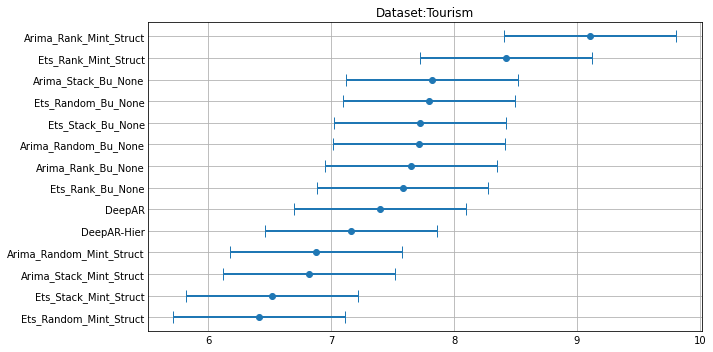

In [27]:
import matplotlib.pyplot as plt

plt.style.use('_mpl-gallery')

x = rank_res.mean().sort_values()
y = list(range(0,14,1))
xerr = [d]*k

# plot:
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_facecolor('white')
ax.errorbar(x, y, xerr = xerr, fmt='o', linewidth=2, capsize=6)
ax.set_yticks(list(range(0,14,1)),list(x.index))
ax.set_title('Dataset:Tourism')
# plt.show()
plt.tight_layout()
plt.savefig('tourism_res.jpg',dpi=200)